In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'NFLX'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
ma_100_days = data.Low.rolling(100).mean()

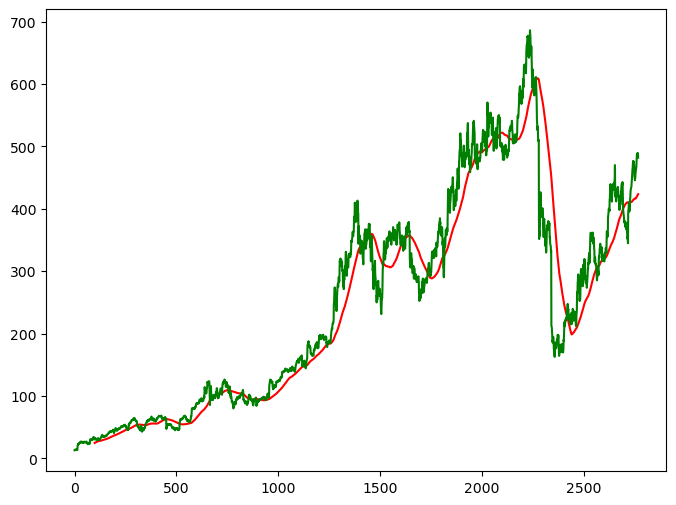

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Low, 'g')
plt.show()

In [7]:
ma_200_days = data.Low.rolling(200).mean()

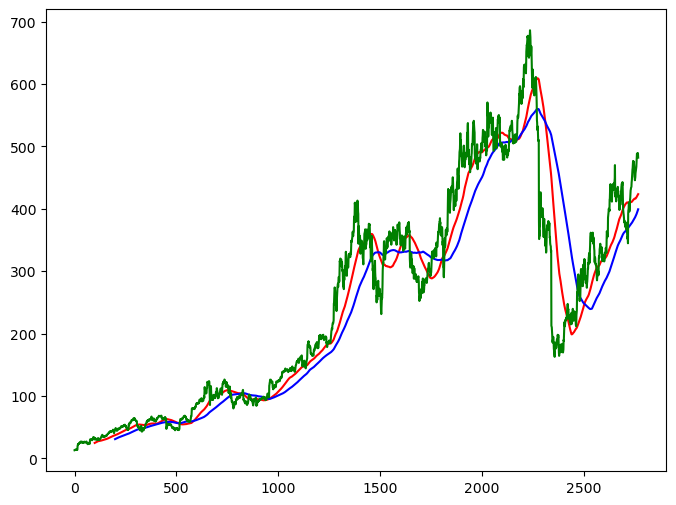

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Low, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Low[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Low[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0] , data_test.shape[0]

(2214, 554)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [15]:
x,y = np.array(x), np.array(y)

In [19]:
import tensorflow as tf

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units= 50, activation = 'relu' , return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [22]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 [==============================] - 11s 115ms/step - loss: 0.0259
Epoch 2/50
67/67 [==============================] - 7s 111ms/step - loss: 0.0066
Epoch 3/50
67/67 [==============================] - 7s 111ms/step - loss: 0.0054
Epoch 4/50
67/67 [==============================] - 8s 112ms/step - loss: 0.0065
Epoch 5/50
67/67 [==============================] - 7s 110ms/step - loss: 0.0061
Epoch 6/50
67/67 [==============================] - 7s 109ms/step - loss: 0.0058
Epoch 7/50
67/67 [==============================] - 8s 113ms/step - loss: 0.0044
Epoch 8/50
67/67 [==============================] - 8s 121ms/step - loss: 0.0037
Epoch 9/50
67/67 [==============================] - 8s 120ms/step - loss: 0.0037
Epoch 10/50
67/67 [==============================] - 8s 117ms/step - loss: 0.0043
Epoch 11/50
67/67 [==============================] - 8s 115ms/step - loss: 0.0044
Epoch 12/50
67/67 [==============================] - 8s 113ms/step - loss: 0.0049
Epoch 13/50
67/67 [=====

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True )

In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

In [29]:
x,y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 31ms/step


In [31]:
scale = 1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

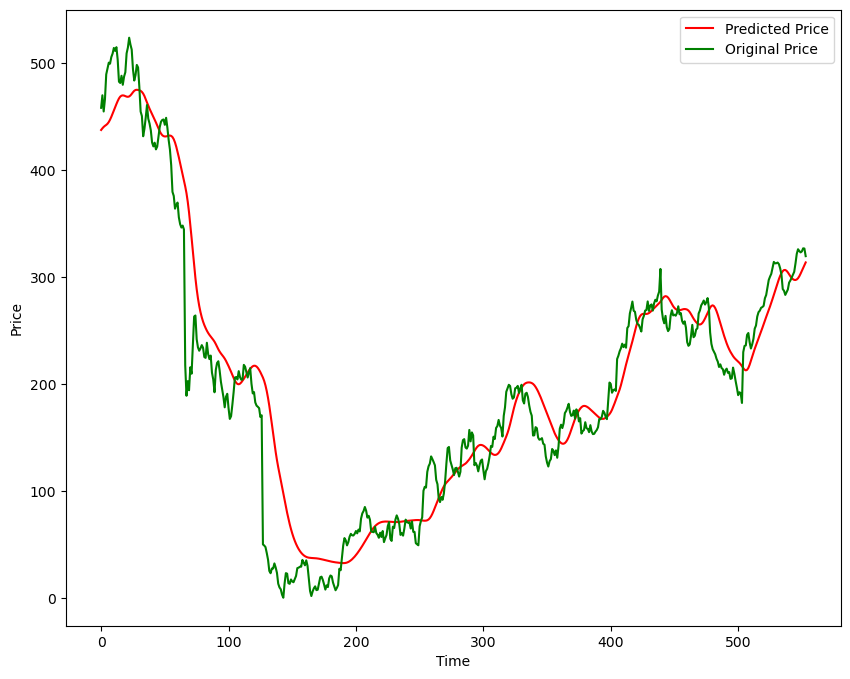

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y, 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Stock Predictions Model.keras')